In [1]:
import numpy as np
import matplotlib.pyplot as plt
from threeML import *


WARNING UserWarning: Using default configuration from /home/simonste/.venv/3ml/local/lib/python2.7/site-packages/threeML-0.4.946-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /home/simonste/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [2]:
# reverse these colormaps so that it goes from light to dark

REVERSE_CMAP = ['summer', 'autumn', 'winter', 'spring', 'copper']

# clip some colormaps so the colors aren't too light

CMAP_RANGE = dict(gray={'start':200, 'stop':0},
                  Blues={'start':60, 'stop':255},
                  Oranges={'start':100, 'stop':255},
                  OrRd={'start':60, 'stop':255},
                  BuGn={'start':60, 'stop':255},
                  PuRd={'start':60, 'stop':255},
                  YlGn={'start':60, 'stop':255},
                  YlGnBu={'start':60, 'stop':255},
                  YlOrBr={'start':60, 'stop':255},
                  YlOrRd={'start':60, 'stop':255},
                  hot={'start':230, 'stop':0},
                  bone={'start':200, 'stop':0},
                  pink={'start':160, 'stop':0})

def cmap_intervals(length=50, cmap='YlOrBr', start=None, stop=None):
    """
    Return evenly spaced intervals of a given colormap `cmap`.
    Colormaps listed in REVERSE_CMAP will be cycled in reverse order.
    Certain colormaps have pre-specified color ranges in CMAP_RANGE. These module
    variables ensure that colors cycle from light to dark and light colors are
    not too close to white.
    :param length: int the number of colors used before cycling back to first color. When
    length is large (> ~10), it is difficult to distinguish between
    successive lines because successive colors are very similar.
    :param cmap: str name of a matplotlib colormap (see matplotlib.pyplot.cm)
    """
    cm = getattr(plt.cm, cmap)

    # qualitative color maps
    if cmap in  ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3', 'Vega10',
                             'Vega20', 'Vega20b', 'Vega20c']:


        base_n_colors = cm.N

        cmap_list = cm(range(base_n_colors))

        if base_n_colors < length:


            factor = int(np.floor_divide(length,base_n_colors))


            cmap_list = np.tile(cmap_list,(factor,1))


        return cmap_list


    crange = CMAP_RANGE.get(cmap, dict(start=0, stop=255))
    if cmap in REVERSE_CMAP:
        crange = dict(start=crange['stop'], stop=crange['start'])
    if start is not None:
        crange['start'] = start
    if stop is not None:
        crange['stop'] = stop


    idx = np.linspace(crange['start'], crange['stop'], length).astype(np.int)
    return cm(idx)

In [56]:
def stack_plot(x_values,*y_values,**kwargs):
    """
    Creates a stack plot of histograms
    :param x_values: the x range
    :param y_values: the y values of each plots
    :param scale: (optional) the scale * max y to separate the plots (default 0.5)
    :param x_scale: (optional) the x scaling 
    :param x_label: (optional) the x label
    :param cmap: (optional) the cmap for the scales
    :param line_color: (optional) the line color above the plot
    """
    
    _default_kwargs={'scale':0.5,
                     'x_scale':'linear',
                     'x_label':'x',
                     'cmap': 'viridis',
                     'line_color':None,
                    
                    }
    
    
    for k,v in _default_kwargs.iteritems():
        
        
        if k in kwargs:
            
            _default_kwargs[k] = kwargs.pop(k)
    
    
    
    fig, ax = plt.subplots(figsize = (15,15))
    
    n_lines = len(y_values)
    
    
    #colors = cmap_intervals(n_lines, _default_kwargs['cmap'])
    lcolor = ['saddlebrown','royalblue','limegreen','goldenrod','tomato','purple','orange','grey','turquoise','yellow','pink','black']
    
    max_y = np.max(map(np.max,y_values))
    
    delta_y = _default_kwargs['scale'] * max_y
    
    y_addition = 0.
    
    zorder = -10.
    
    for i,y in enumerate(y_values):
        
        idx = y>0.
        
        
        ax.fill_between(x_values[idx],
                        y_addition,
                        y_addition + y[idx],
                        zorder=zorder,
                        color=lcolor[i],
                        **kwargs)
        
        if _default_kwargs['line_color'] is None:
            
            color = lcolor[i]
            
        else:
            
            color = _default_kwargs['line_color']
            
        ax.plot(x_values[idx],y_addition + y[idx],
                color=color,
                lw=1.2,
                zorder=zorder, label = labellist[i])
            
        
        y_addition += delta_y
        zorder-=1
        
    ax.set_xscale(_default_kwargs['x_scale'])
    ax.set_xlabel(_default_kwargs['x_label'],fontsize  = 20)
    
    ax.set_xticks(np.arange(60,79,1))
    ax.set_yticks([])
    
    return fig

In [58]:
bins = np.linspace(60,78,200)

model cloned


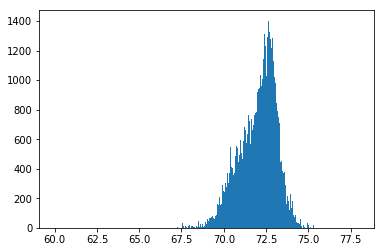

In [5]:
Rinner = load_analysis_results('HSESRinner06_03.fits')
inkpost = Rinner.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESRinnergband.Inkl')
countsRin , binsRin, barsRin = plt.hist(inkpost.samples,bins = bins)

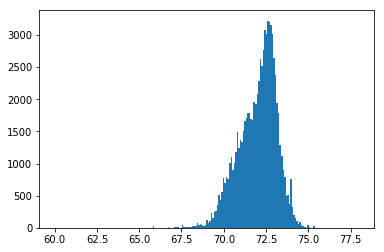

In [59]:
countsRin , binsRin, barsRin = plt.hist(inkpost.samples,bins = bins)
countsRin = countsRin/np.sum(countsRin)

In [7]:
em = load_analysis_results('HSESDsizeincl0102_2.fits')
inkpost2 = em.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Inkl')

model cloned


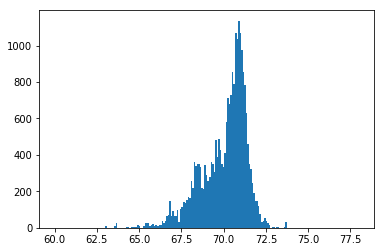

In [60]:
countsem , binsem, barsRin = plt.hist(inkpost2.samples,bins = bins)
countsem = countsem/np.sum(countsem)

In [9]:
mng = load_analysis_results('../XrbHSESDsizeinclonlyg0602Multinest.fits')
inkpost3 = mng.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Inkl')

model cloned


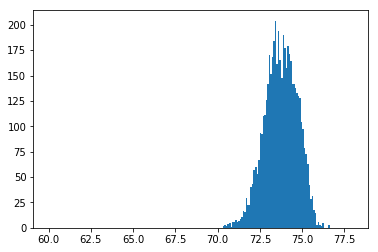

In [61]:
countsmng , binsmng, barsRin = plt.hist(inkpost3.samples,bins = bins)
countsmng = countsmng/np.sum(countsmng)

In [11]:
mnr = load_analysis_results('../XrbHSESDsizeinclonlyr0602Multinest.fits')
inkpost4 = mnr.get_variates('Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.Inkl')

model cloned


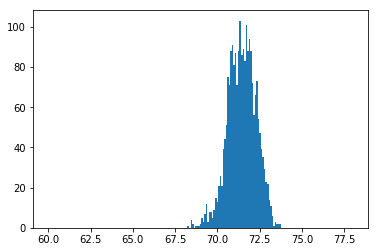

In [62]:
countsmnr , binsmnr, barsRin = plt.hist(inkpost4.samples,bins = bins)
countsmnr = countsmnr/np.sum(countsmnr)

In [13]:
mni = load_analysis_results('../XrbHSESDsizeinclonlyi0602Multinest.fits')
inkpost5 = mni.get_variates('Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.Inkl')

model cloned


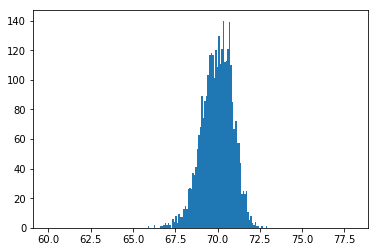

In [63]:
countsmni , binsmni, barsRin = plt.hist(inkpost5.samples,bins = bins)
countsmni = countsmni/np.sum(countsmni)

In [15]:
mnz = load_analysis_results('../XrbHSESDsizeinclonlyz0602Multinest.fits')
inkpost6 = mnz.get_variates('Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.Inkl')

model cloned


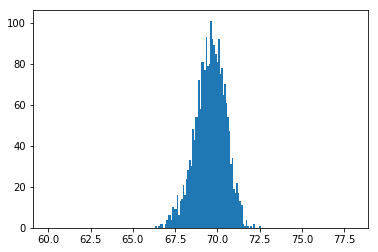

In [64]:
countsmnz , binsmnz, barsRin = plt.hist(inkpost6.samples,bins = bins)
countsmnz = countsmnz/np.sum(countsmnz)

In [17]:
mnJ = load_analysis_results('../XrbHSESDsizeinclonlyJ0602Multinest.fits')
inkpost7 = mnJ.get_variates('Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.Inkl')

model cloned


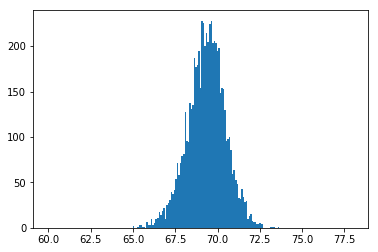

In [65]:
countsmnJ , binsmnJ, barsRin = plt.hist(inkpost7.samples,bins = bins)
countsmnJ = countsmnJ/np.sum(countsmnJ)

In [19]:
mnH = load_analysis_results('../XrbHSESDsizeinclonlyH0602Multinest.fits')
inkpost8 = mnH.get_variates('Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.Inkl')

model cloned


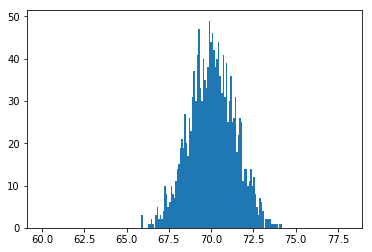

In [66]:
countsmnH , binsmnH, barsRin = plt.hist(inkpost8.samples,bins = bins)
countsmnH = countsmnH/np.sum(countsmnH)

In [21]:
mnK = load_analysis_results('../XrbHSESDsizeinclonlyK0602Multinest.fits')
inkpost9 = mnK.get_variates('Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.Inkl')

model cloned


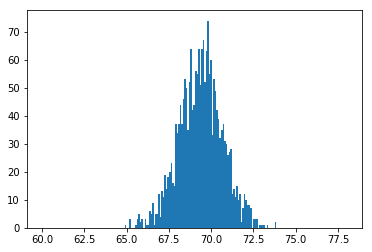

In [67]:
countsmnK , binsmnK, barsRin = plt.hist(inkpost9.samples,bins = bins)
countsmnK = countsmnK/np.sum(countsmnK)

In [25]:
mnRJ = load_analysis_results('HSESDsizeincl2503RJ.fits')
inkpost10 = mnRJ.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Inkl')

model cloned


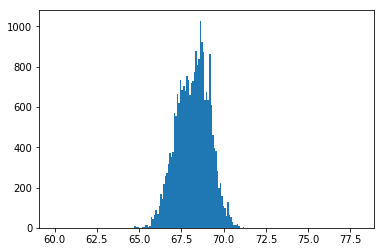

In [68]:
countsmnRJ , binsmnRJ, barsRin = plt.hist(inkpost10.samples,bins = bins)
countsmnRJ = countsmnRJ/np.sum(countsmnRJ)

In [27]:
mnAVup = load_analysis_results('HSESDsizeincl2903AVup03.fits')
inkpost11 = mnAVup.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Inkl')

model cloned


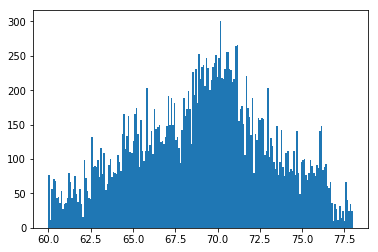

In [69]:
countsmnAVup , binsmnAVup ,barsRin = plt.hist(inkpost11.samples,bins = bins)
countsmnAVup = countsmnAVup/np.sum(countsmnAVup)

In [30]:
mnAVd = load_analysis_results('HSESDsizeincl2503AVdown03.fits')
inkpost12 = mnAVd.get_variates('Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Inkl')

model cloned


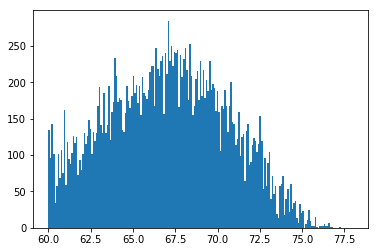

In [70]:
countsmnAVd , binsmnAVd ,barsRin = plt.hist(inkpost12.samples,bins = bins)
countsmnAVd = countsmnAVd/np.sum(countsmnAVd)

In [77]:
import pandas as pd

In [90]:
tableofhist = pd.DataFrame(data = np.array([bins[:199] , countsem,countsmng,countsmnr,countsmni,countsmnz,countsmnJ,countsmnH,countsmnK,countsmnRJ,countsmnAVd,countsmnAVup,countsRin]).T,columns = [labellist],index=np.arange(199))

In [91]:
tableofhist.to_csv('Histogramtable.csv')

In [92]:
labellist = ['emcee sec. 7.7.1', 'MULTINEST g band', 'MULTINEST r band', 'MULTINEST i band', 'MULTINEST z band', 'MULTINEST J band', 'MULTINEST H band', 'MULTINEST K band', 'emcee with Radio Jet', r'emcee with lower $A_V$', r'emcee with higher $A_V$', r'emcee with $R_{in}$ incl.']
lcolor = ['saddlebrown','royalblue','limegreen','goldenrod','tomato','purple','orange','grey','turquoise','yellow','pink','black']

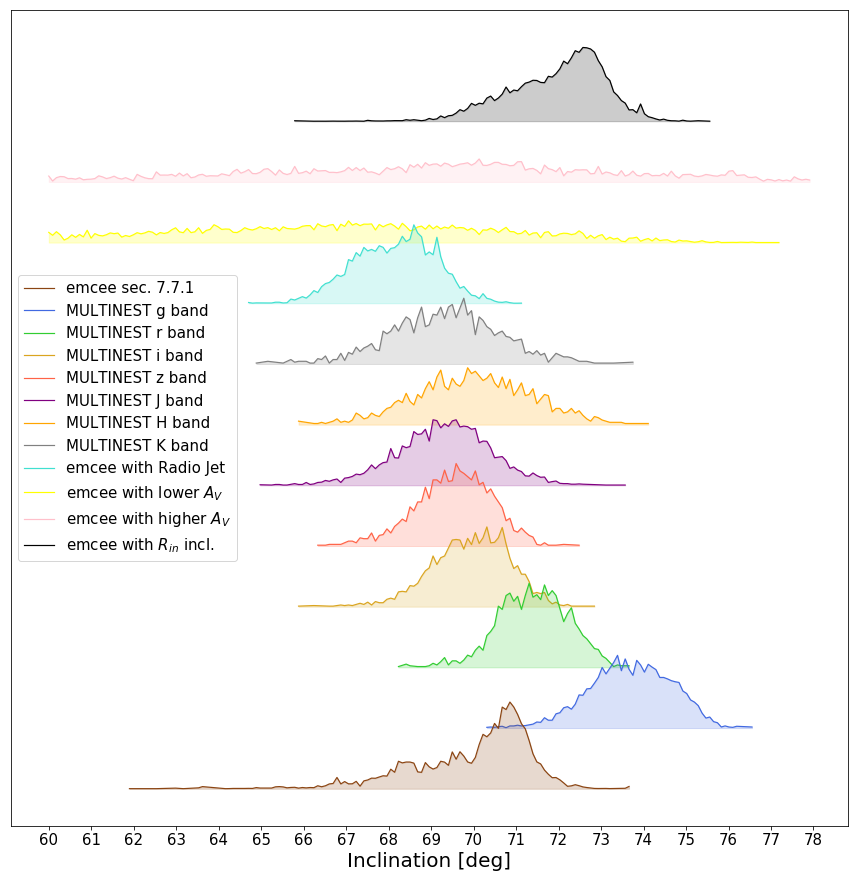

In [76]:
figu = stack_plot(bins[:199] , countsem,countsmng,countsmnr,countsmni,countsmnz,countsmnJ,countsmnH,countsmnK,countsmnRJ,countsmnAVd,countsmnAVup,countsRin,scale = .7,x_label = 'Inclination [deg]',alpha = 0.2);
figu.axes[0].legend(fontsize = 15 ,loc = 6)
plt.xticks(fontsize = 15)
figu.savefig('Plots/fancy.pdf')
#figu.axes[0].axvspan(xmax=71.5,xmin=68.5,ymin = 0.135,alpha = 0.1 ,color = lcolor[0])


WARNING UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".



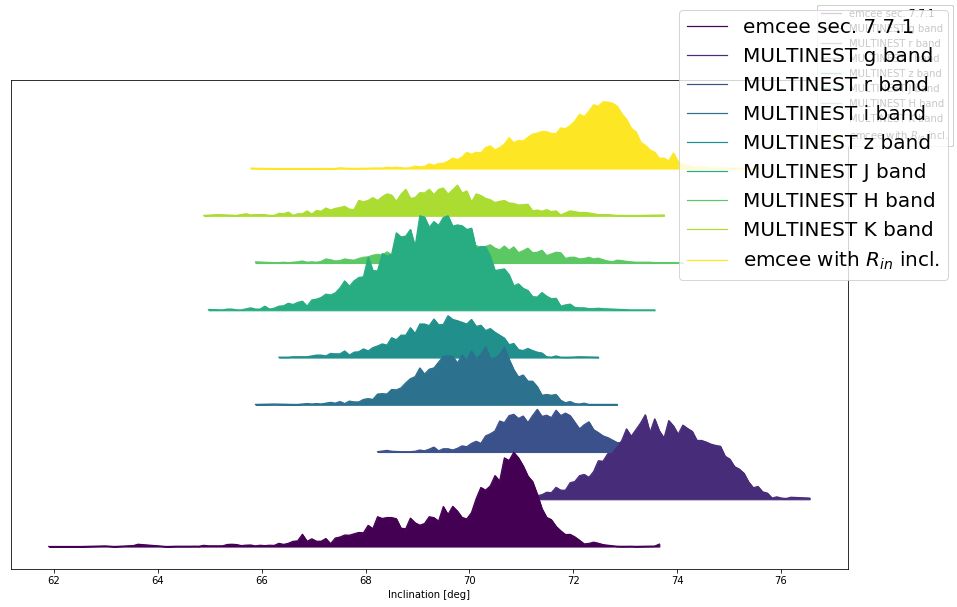

In [6]:
bins = np.linspace(60,78,200)

array([60.        , 60.09045226, 60.18090452, 60.27135678, 60.36180905,
       60.45226131, 60.54271357, 60.63316583, 60.72361809, 60.81407035,
       60.90452261, 60.99497487, 61.08542714, 61.1758794 , 61.26633166,
       61.35678392, 61.44723618, 61.53768844, 61.6281407 , 61.71859296,
       61.80904523, 61.89949749, 61.98994975, 62.08040201, 62.17085427,
       62.26130653, 62.35175879, 62.44221106, 62.53266332, 62.62311558,
       62.71356784, 62.8040201 , 62.89447236, 62.98492462, 63.07537688,
       63.16582915, 63.25628141, 63.34673367, 63.43718593, 63.52763819,
       63.61809045, 63.70854271, 63.79899497, 63.88944724, 63.9798995 ,
       64.07035176, 64.16080402, 64.25125628, 64.34170854, 64.4321608 ,
       64.52261307, 64.61306533, 64.70351759, 64.79396985, 64.88442211,
       64.97487437, 65.06532663, 65.15577889, 65.24623116, 65.33668342,
       65.42713568, 65.51758794, 65.6080402 , 65.69849246, 65.78894472,
       65.87939698, 65.96984925, 66.06030151, 66.15075377, 66.24

In [88]:
['test'].append['X']

TypeError: 'builtin_function_or_method' object has no attribute '__getitem__'